Nama : Rika Ajeng Finatih

NIM : 121450036

Kelas : RA

# **TUGAS INDIVIDU**

## **NEURAL NETWORK**

## A. ANN (Artificial Neural Network)

* Import library yang diperlukan

In [ ]:
import numpy as np # Import library NumPy untuk operasi numerik
import tensorflow as tf # Import library TensorFlow untuk membangun dan melatih jaringan saraf
from tensorflow import keras # Import API Keras untuk membangun model pembelajaran mendalam
from tensorflow.keras import layers # Import modul layers untuk mendefinisikan lapisan model
from tensorflow.keras.preprocessing import image # Import modul image untuk prapemrosesan data
from tensorflow.keras.preprocessing.image import ImageDataGenerator # Import kelas ImageDataGenerator untuk menyiapkan data gambar

* Tentukan path dataset

In [ ]:
from google.colab import drive # Import utilitas pemasangan drive Google Colab
drive.mount('/content/drive') # Hubungkan drive Google Colab untuk mengakses file lokal

Mounted at /content/drive


In [ ]:
# Definisikan jalur ke direktori pelatihan dan pengujian
train_data_dir = '/content/drive/MyDrive/train'
test_data_dir  = '/content/drive/MyDrive/valid'

* Persiapan data dengan augmentasi gambar

In [ ]:
# Buat objek ImageDataGenerator untuk data pelatihan dan pengujian
train_datagen = ImageDataGenerator(
                                   rescale=1./255, # Skala nilai piksel ke rentang antara 0 dan 1
                                   shear_range=0.2, # Terapkan penyimpangan acak pada gambar
                                   zoom_range=0.2, # Terapkan zooming acak pada gambar
                                   horizontal_flip=True) # Balikkan gambar secara horizontal secara acak
test_datagen = ImageDataGenerator(rescale=1./255) # Skala nilai piksel ke rentang antara 0 dan 1

train_generator = train_datagen.flow_from_directory( # Buat generator untuk data pelatihan dan pengujian
    train_data_dir, # Tentukan direktori yang berisi gambar pelatihan
    target_size=(64, 64),  # Atur ukuran gambar target menjadi 64x64 piksel
    batch_size=32, # Tentukan ukuran batch untuk pelatihan
    class_mode='binary' # Atur mode kelas menjadi 'biner' karena ini adalah masalah klasifikasi dua kelas
)

test_generator = test_datagen.flow_from_directory(  # Tentukan direktori yang berisi gambar pengujia
    test_data_dir,
    target_size=(64, 64), # Atur ukuran gambar target menjadi 64x64 piksel
    batch_size=32, # Tentukan ukuran batch untuk pengujian
    class_mode='binary'  # Atur mode kelas menjadi 'biner' karena ini adalah masalah klasifikasi dua kelas
)

Found 800 images belonging to 2 classes.
Found 199 images belonging to 2 classes.


* Bangun model ANN sederhana

In [ ]:
# Membangun model CNN
model = keras.Sequential([
    layers.Conv2D(32, (3, 3), input_shape=(64, 64, 3), activation='relu'), # Lapisan convolutional pertama dengan 32 filter 3x3
    layers.MaxPooling2D(pool_size=(2,2)), # Lapisan pooling maksimum 2x2
    layers.Flatten(), # Lapisan flatten untuk mengubah hasil pooling menjadi array 1D
    layers.Dense(128, activation='relu'), # Lapisan fully connected (FC) pertama dengan 128 neuron dan aktivasi relu
    layers.Dropout(0.5), # Lapisan dropout untuk mencegah overfitting
    layers.Dense(1, activation='sigmoid') # Lapisan fully connected (FC) terakhir dengan 1 neuron dan aktivasi sigmoid untuk klasifikasi biner
])

* Kompilasi model dengan optimizer, loss function, dan metrik yang sesuai

In [ ]:
# Mengkompilasi model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

* Latih model pada data pelatihan

In [ ]:
# Melatih model menggunakan data pelatihan
model.fit(train_generator, epochs=5, validation_data=test_generator)

Epoch 1/5
25/25 [==============================] - 29s 1s/step - loss: 0.6529 - accuracy: 0.6787 - val_loss: 0.6986 - val_accuracy: 0.5528
Epoch 2/5
25/25 [==============================] - 25s 1s/step - loss: 0.4079 - accuracy: 0.8213 - val_loss: 0.6385 - val_accuracy: 0.6131
Epoch 3/5
25/25 [==============================] - 26s 1s/step - loss: 0.3280 - accuracy: 0.8637 - val_loss: 0.8555 - val_accuracy: 0.5930
Epoch 4/5
25/25 [==============================] - 25s 1s/step - loss: 0.3033 - accuracy: 0.8813 - val_loss: 0.4373 - val_accuracy: 0.7638
Epoch 5/5
25/25 [==============================] - 24s 962ms/step - loss: 0.2546 - accuracy: 0.8913 - val_loss: 0.3409 - val_accuracy: 0.8794


* Evaluasi performa model pada data pengujian

In [ ]:
# Mengevaluasi kinerja model pada data pengujian
test_loss, test_acc = model.evaluate(test_generator)
print(f'\nAkurasi pengujian: {test_acc}')

7/7 [==============================] - 5s 715ms/step - loss: 0.3409 - accuracy: 0.8794

Akurasi pengujian: 0.8793969750404358


* Lakukan prediksi menggunakan model

In [ ]:
# Fungsi untuk memprediksi kelas gambar
def predict(image_path):
  img = image.load_img(image_path, target_size=(64, 64)) # Memuat gambar
  img_array = image.img_to_array(img) # Mengubah gambar menjadi array NumPy
  img_array = np.expand_dims(img_array, axis=0) # Menambahkan dimensi batch (sebagai batch 1)
  img_array /= 255.0  # Melakukan normalisasi (skala) 0 hingga 1

  prediction = model.predict(img_array) # Memprediksi kelas gambar

  # Menampilkan hasil prediksi
  if prediction[0][0] > 0.5:
    print('Prediksi : Terkena Hama')
  else:
    print('Prediksi : Tidak Terkena Hama')

# Memprediksi kelas gambar daun sawi yang terkena hama
image_path = test_data_dir + '/Data Sawi Ada Hama/103.png'
predict(image_path)

# Memprediksi kelas gambar daun sawi yang tidak terkena hama
image_path = test_data_dir + '/Data Sawi Tanpa Hama/103.png'
predict(image_path)

1/1 [==============================] - 0s 103ms/step
Prediksi : Tidak Terkena Hama
1/1 [==============================] - 0s 22ms/step
Prediksi : Terkena Hama


**Latihan**

1. Buatlah sebuah model ANN dengan studi kasus gambar sayur
sawi dengan database “data Latihan”
https://drive.google.com/drive/folders/11ZbhPyFGk7aosX0G_ariVXBfB2VGCGi7?usp=sharing. Analisis data antara data yang
ada dimodul dengan data Latihan.

Dalam percobaan praktikum ini, model Artificial Neural Network (ANN) digunakan untuk memprediksi kelas pada dataset SAWI yang terdiri dari gambar dengan dua label, yaitu "ada hama" dan "tanpa hama".

Pertama-tama, dataset dibagi menjadi data pelatihan dan pengujian data. Data pelatihan berasal dari direktori 'train', sementara data pengujian berasal dari direktori 'valid'. Output dari generator menunjukkan bahwa terdapat 800 gambar dalam direktori pelatihan, dengan dua kelas yang berbeda. Sementara itu, direktori pengujian memiliki 199 gambar, juga diuraikan dalam dua kelas.

Model yang dibangun menggunakan lapisan-lapisan CNN, termasuk Conv2D, MaxPooling2D, dan Dense. Lapisan dropout juga diterapkan untuk mengatasi overfitting. Fungsi aktivasi 'relu' digunakan untuk beberapa lapisan, dan fungsi 'sigmoid' digunakan pada lapisan output untuk klasifikasi biner. Model dikompilasi menggunakan pengoptimal Adam, fungsi kerugian biner crossentropy, dan akurasi metrik.

Selanjutnya, model dibor selama 5 epoch menggunakan data pelatihan, dengan evaluasi kinerja pada pengujian data. Output pelatihan mencakup nilai loss dan akurasi untuk setiap epoch. Nilai loss mencerminkan rata-rata kesalahan prediksi pada batch, sedangkan akurasi adalah rata-rata prediksi yang benar pada batch tersebut. Dari hasil pelatihan terlihat penurunan loss dari 0.6529 menjadi 0.2546, sementara akurasi meningkat dari 0.6787 menjadi 0.8913.

Pada tahap prediksi menggunakan model, gambar dari dataset diuji untuk melihat kemampuan model dalam mengklasifikasikan. Hasilnya menunjukkan bahwa model dapat dengan benar memprediksi kelas gambar, bahkan ketika hasil pengelompokan manual awal salah. Ini menunjukkan bahwa model ANN berhasil belajar dan menggeneralisasi dengan baik ke data yang tidak terlihat sebelumnya.

Dengan demikian, berdasarkan akurasi yang diperoleh dari model ANN dan kesesuaian prediksi pada contoh gambar, dapat disimpulkan bahwa model bekerja dengan baik dalam tugas klasifikasi biner pada dataset SAWI yang digunakan.

2. Buatlah flowchart dan Pseudocode untuk model diatas.

* Pseudecode



```
# Impor library yang diperlukan
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Mount Google Drive untuk mengakses dataset
from google.colab import drive
drive.mount('/content/drive')

# Tentukan path dataset
train_data_dir = '/content/drive/MyDrive/train'
test_data_dir  = '/content/drive/MyDrive/valid'

# Persiapkan data dengan augmentasi gambar
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(64, 64),
    batch_size=32,
    class_mode='binary'
)

test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(64, 64),
    batch_size=32,
    class_mode='binary'
)

# Bangun model ANN sederhana
model = keras.Sequential([
    layers.Conv2D(32, (3, 3), input_shape=(64, 64, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')
])

# Kompilasi model dengan optimizer, fungsi loss, dan metrik yang sesuai
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Latih model pada data pelatihan
model.fit(train_generator, epochs=5, validation_data=test_generator)

# Evaluasi performa model pada data pengujian
test_loss, test_acc = model.evaluate(test_generator)
print(f'\nAkurasi pengujian: {test_acc}')

# Lakukan prediksi menggunakan model
def predict(image_path):
  img = image.load_img(image_path, target_size=(64, 64))
  img_array = image.img_to_array(img)
  img_array = np.expand_dims(img_array, axis=0)
  img_array /= 255.0

  prediction = model.predict(img_array)

  if prediction[0][0] > 0.5:
    print('Prediksi : Terkena Hama')
  else:
    print('Prediksi : Tidak Terkena Hama')

# Contoh prediksi
image_path_infested = test_data_dir + '/Data Sawi Ada Hama/103.png'
predict(image_path_infested)

image_path_not_infested = test_data_dir + '/Data Sawi Tanpa Hama/103.png'
predict(image_path_not_infested)

```



* Flowchart

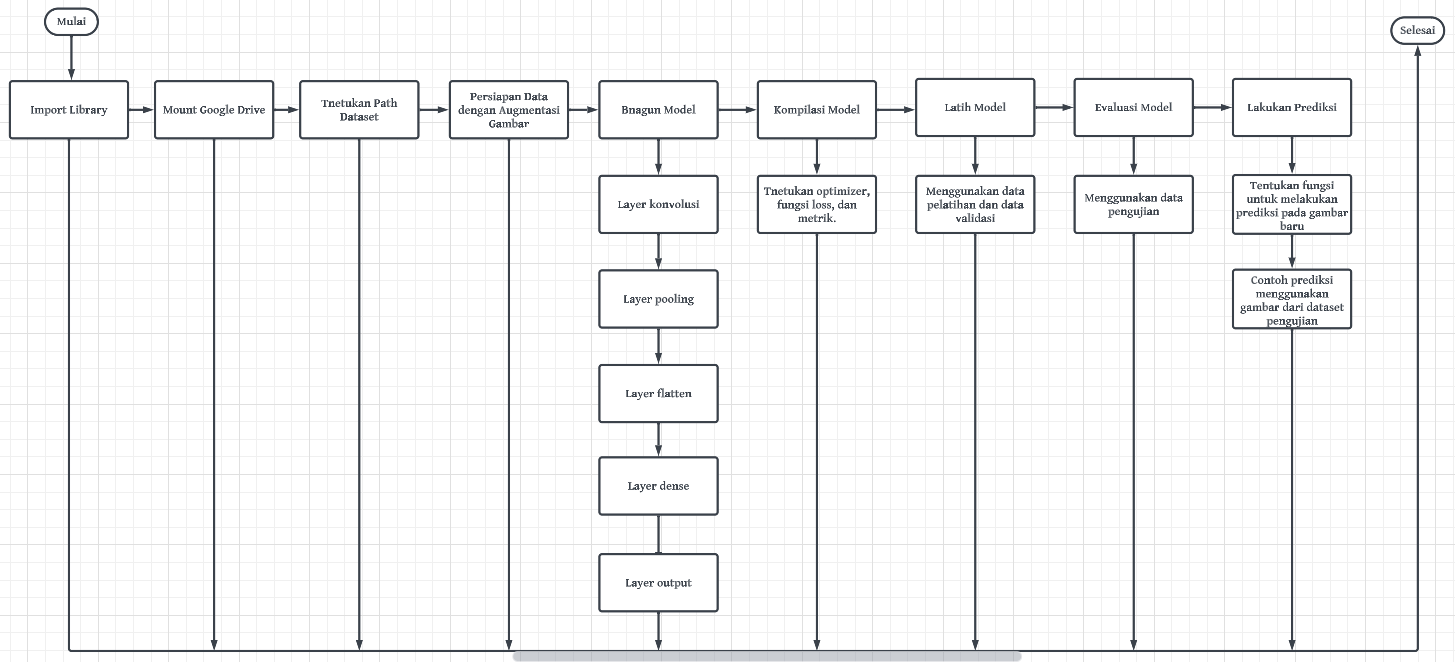

# B. CNN (Convelution Neural Network)

* Tahap pertama persiapan data dan library

In [ ]:
# Import library yang diperlukan
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from PIL import Image
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras

* Pastikan terhubung dengan Gdrive masing masing

In [ ]:
from google.colab import drive
drive.mount('/content/drive') # Mount Google Colab drive untuk mengakses data

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Tentukan path untuk data gambar daun sawi dengan dan tanpa hama
path_with_pest = '/content/drive/MyDrive/valid/Data Sawi Ada Hama'
path_without_pest = '/content/drive/MyDrive/valid/Data Sawi Tanpa Hama'

# Load daftar file gambar daun sawi dengan hama
pest_files = os.listdir(path_with_pest)
print(pest_files[0:5])
print(pest_files[-5:])

# Load daftar file gambar daun sawi tanpa hama
nopest_files = os.listdir(path_without_pest)
print(nopest_files[0:5])
print(nopest_files[-5:])

# Hitung jumlah gambar daun sawi dengan dan tanpa hama
print(f'Number of with pest image:{len(pest_files)}')
print(f'Number of without pest image:{len(nopest_files)}')


['13.png', '12.png', '117.png', '10.png', '101.png']
['153.png', '164.png', '155.png', '18.png', '181.png']
['102.png', '114.png', '104.png', '128.png', '127.png']
['138.png', '145.png', '159.png', '187.png', '18.png']
Number of with pest image:99
Number of without pest image:100


* Membuat label pada data

[0, 0, 0, 0, 0]
[1, 1, 1, 1, 1] None
99
100
199
[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


<function matplotlib.pyplot.show(close=None, block=None)>

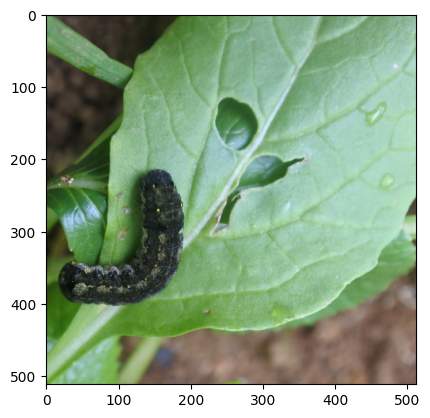

In [ ]:
# Buat label 1 untuk gambar daun sawi dengan hama dan 0 untuk gambar daun sawi tanpa hama
pest_files = [1]*len(pest_files)
nopest_files = [0]*len(nopest_files)
print(pest_files[0:5], print(nopest_files[0:5]))
print(len(pest_files)), print(len(nopest_files))

# Gabungkan label gambar daun sawi dengan dan tanpa hama
labels = pest_files + nopest_files
print(len(labels))
print(labels[0:5])
print(labels[-5:])

# Tampilkan gambar daun sawi dengan hama
img = mpimg.imread(path_with_pest + '/16.png')
imgplot = plt.imshow(img)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

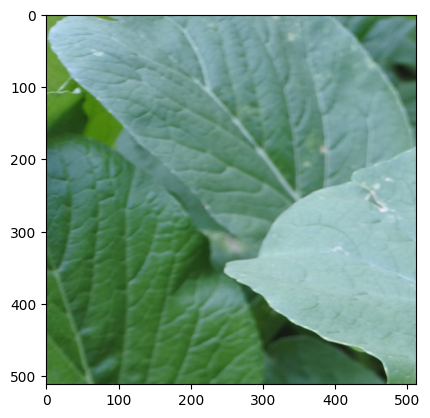

In [ ]:
# Tampilkan gambar daun sawi tanpa hama
img = mpimg.imread(path_without_pest + '/16.png')
imgplot = plt.imshow(img)
plt.show

* Pemrosesan data

In [ ]:
data = [] #Buat variabel data untuk menyimpan data gambar.

In [ ]:
pest_files = os.listdir(path_with_pest)

for img_file in pest_files : # Untuk setiap gambar daun sawi dengan hama, lakukan:
  image = Image.open(path_with_pest + '/' + str(img_file)) # Buka gambar dari direktori.
  image = image.resize ((128,128)) # Ubah ukuran gambar menjadi 128x128 piksel.
  image = image.convert('RGB') # Ubah format gambar menjadi RGB.
  image = np.array(image) # Ubah gambar menjadi array NumPy.
  data.append(image) # Tambahkan gambar ke variabel data.

In [ ]:
nopest_files = os.listdir(path_without_pest)

for img_file in nopest_files: # setiap gambar daun sawi tanpa hama, lakukan:
  image = Image.open(path_without_pest + '/' + str(img_file)) # Buka gambar dari direktori.
  image = image.resize((128,128)) # Ubah ukuran gambar menjadi 128x128 piksel.
  image = image.convert('RGB') # Ubah format gambar menjadi RGB.
  image = np.array(image) # Ubah gambar menjadi array NumPy.
  data.append(image) # Tambahkan gambar ke variabel data.

In [ ]:
type(data), len(data)

(list, 199)

In [ ]:
data[0]

array([[[145, 189, 137],
        [143, 187, 134],
        [141, 187, 131],
        ...,
        [185, 230, 210],
        [187, 231, 211],
        [194, 234, 218]],

       [[144, 188, 135],
        [141, 185, 130],
        [143, 189, 138],
        ...,
        [187, 231, 210],
        [189, 232, 213],
        [193, 234, 216]],

       [[142, 187, 133],
        [140, 184, 130],
        [142, 189, 136],
        ...,
        [193, 235, 218],
        [196, 237, 221],
        [197, 237, 223]],

       ...,

       [[ 96, 155,  71],
        [114, 170, 106],
        [142, 189, 149],
        ...,
        [158, 137, 121],
        [166, 144, 130],
        [168, 148, 132]],

       [[119, 172, 125],
        [150, 194, 169],
        [164, 203, 184],
        ...,
        [156, 133, 119],
        [160, 138, 124],
        [158, 139, 123]],

       [[158, 202, 186],
        [177, 213, 208],
        [163, 202, 181],
        ...,
        [152, 129, 116],
        [156, 134, 121],
        [153, 133, 118]]

In [ ]:
# converting image list and label list to numpy arrays
x = np.array(data) # Konversi daftar gambar ke array NumPy.
y = np.array(labels) #Konversi daftar label ke array NumPy.

* Train test split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 42)
print(x.shape, x_train.shape, x_test.shape) # Bagi data menjadi set pelatihan dan pengujian dengan ukuran 80% dan 20%, masing-masing.

(199, 128, 128, 3) (159, 128, 128, 3) (40, 128, 128, 3)


In [ ]:
x_train_scaled = x_train/255
x_test_scaled = x_test/255
x_train[0], x_train_scaled[0]

(array([[[ 16,  21,  15],
         [ 14,  19,  13],
         [ 14,  20,  13],
         ...,
         [173, 212, 185],
         [172, 210, 185],
         [170, 208, 183]],
 
        [[ 19,  24,  18],
         [ 17,  23,  17],
         [ 16,  23,  18],
         ...,
         [172, 209, 185],
         [172, 210, 185],
         [173, 210, 186]],
 
        [[ 24,  29,  23],
         [ 24,  29,  24],
         [ 17,  24,  21],
         ...,
         [168, 207, 184],
         [170, 210, 186],
         [172, 211, 188]],
 
        ...,
 
        [[152, 192, 188],
         [149, 189, 187],
         [146, 186, 185],
         ...,
         [137, 178, 163],
         [142, 183, 168],
         [146, 187, 171]],
 
        [[154, 193, 190],
         [156, 194, 193],
         [153, 193, 192],
         ...,
         [137, 177, 162],
         [142, 181, 164],
         [146, 185, 167]],
 
        [[157, 196, 194],
         [157, 196, 195],
         [155, 194, 193],
         ...,
         [142, 181, 164],
  

* CNN

In [ ]:
num_of_classes = 2

model = keras.Sequential() # Buat objek model jaringan saraf.

model.add(keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(128,128,3))) # Tambahkan lapisan convolutional pertama dengan 32 filter, ukuran kernel 3x3, dan aktivasi ReLU.
model.add(keras.layers.MaxPooling2D(pool_size=(2,2))) # ambahkan lapisan pooling maksimum pertama dengan ukuran kolam 2x2.

model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu')) # Tambahkan lapisan convolutional kedua dengan 64 filter, ukuran kernel 3x3, dan aktivasi ReLU.
model.add(keras.layers.MaxPooling2D(pool_size=(2,2))) # Tambahkan lapisan pooling maksimum kedua dengan ukuran kolam 2x2.

model.add(keras.layers.Flatten()) # Rata-ratakan output dari lapisan convolutional.

model.add(keras.layers.Dense(128, activation='relu')) #Tambahkan lapisan fully connected pertama dengan 128 neuron dan aktivasi ReLU.
model.add(keras.layers.Dropout(0.5)) # Tambahkan lapisan dropout dengan tingkat dropout 0,5.

model.add(keras.layers.Dense(64, activation='relu')) # Tambahkan lapisan fully connected kedua dengan 64 neuron dan aktivasi ReLU.
model.add(keras.layers.Dropout(0.5)) # Tambahkan lapisan dropout dengan tingkat dropout 0,5.

model.add(keras.layers.Dense(num_of_classes, activation='sigmoid')) #Tambahkan lapisan output dengan 2 neuron (untuk klasifikasi biner) dan aktivasi sigmoid.

In [ ]:
# compile the neural network
model.compile(optimizer='adam',
              loss= 'sparse_categorical_crossentropy',
              metrics=['acc'])
#traning the neural network
history = model.fit(x_train_scaled, y_train, validation_split=0.1, epochs=15) # Latih model pada data pelatihan dengan pembagian validasi 0,1 dan 15 epoch.

Epoch 1/15
5/5 [==============================] - 8s 708ms/step - loss: 0.8789 - acc: 0.5315 - val_loss: 0.6762 - val_acc: 0.6250
Epoch 2/15
5/5 [==============================] - 4s 729ms/step - loss: 0.7143 - acc: 0.4965 - val_loss: 0.6975 - val_acc: 0.3750
Epoch 3/15
5/5 [==============================] - 6s 1s/step - loss: 0.6390 - acc: 0.6224 - val_loss: 0.8297 - val_acc: 0.3750
Epoch 4/15
5/5 [==============================] - 6s 1s/step - loss: 0.6204 - acc: 0.6713 - val_loss: 0.6370 - val_acc: 0.8125
Epoch 5/15
5/5 [==============================] - 5s 970ms/step - loss: 0.5558 - acc: 0.7832 - val_loss: 0.5447 - val_acc: 0.7500
Epoch 6/15
5/5 [==============================] - 5s 982ms/step - loss: 0.4603 - acc: 0.8531 - val_loss: 0.5211 - val_acc: 0.8125
Epoch 7/15
5/5 [==============================] - 9s 2s/step - loss: 0.3309 - acc: 0.8671 - val_loss: 1.1100 - val_acc: 0.4375
Epoch 8/15
5/5 [==============================] - 3s 637ms/step - loss: 0.3040 - acc: 0.8741 - val_

* Model Evaluasi

2/2 [==============================] - 0s 89ms/step - loss: 0.4520 - acc: 0.8750
Test Accuracy = 0.875


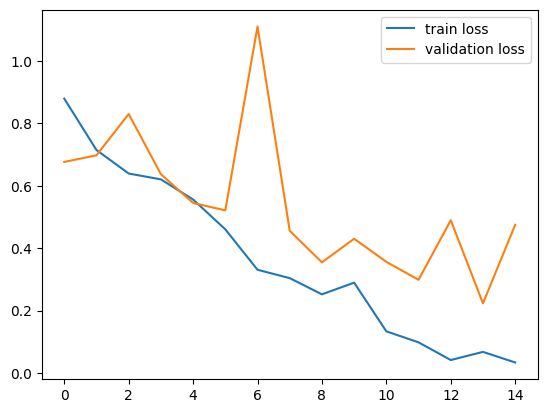

In [ ]:
loss, accuracy = model.evaluate(x_test_scaled, y_test) #Evaluasi model pada data pengujian dan simpan nilai loss dan accuracy.
print('Test Accuracy =', accuracy) #Tampilkan nilai accuracy tes.
h = history

# plot the loss value
plt.plot(h.history['loss'], label ='train loss') #Plot kurva loss pelatihan.
plt.plot(h.history['val_loss'], label = 'validation loss') #Plot kurva loss validasi.
plt.legend() #Tambahkan legenda untuk kurva loss.
plt.show() #Tampilkan plot kurva loss.

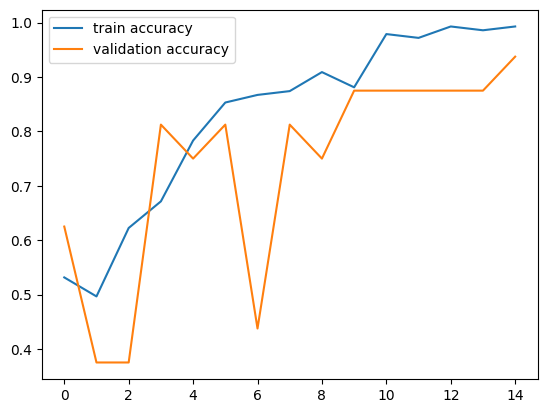

In [ ]:
# plot the accuracy value
plt.plot(h.history['acc'], label = 'train accuracy') #Plot kurva accuracy pelatihan.
plt.plot(h.history['val_acc'], label = 'validation accuracy') #Plot kurva accuracy validasi.
plt.legend() #Tambahkan legenda untuk kurva accuracy.
plt.show() #Tampilkan plot kurva accuracy.


* Sistem prediksi

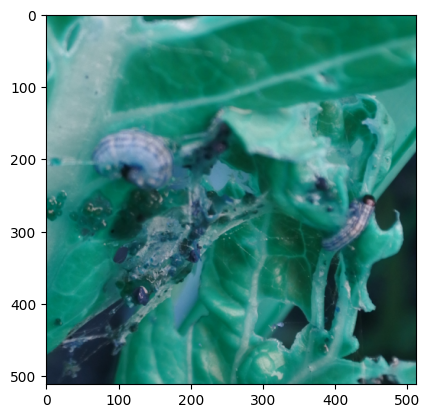

In [ ]:
#input_image_path = input('Path of the image to be predicted: ')
input_image_path = path_with_pest + '/1.png' # membaca jalur gambar yang ingin diprediksi. Jika baris komentar dihapus, program akan meminta pengguna untuk memasukkan jalur gambar secara manual.
input_image = cv2.imread(input_image_path) # membaca gambar dari jalur yang ditentukan.

imgplot = plt.imshow(input_image) # menampilkan gambar yang telah dibaca
plt.show() #menampilkan plot di jendela baru.

In [ ]:
input_image_resized = cv2.resize(input_image, (128,128)) #mengubah ukuran gambar menjadi 128x128 piksel
input_image_scaled = input_image_resized/225
input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

1/1 [==============================] - 0s 144ms/step


In [ ]:
print(input_prediction)

[[0.00193729 0.94503695]]


In [ ]:
input_pred_label = np.argmax(input_prediction) #mendapatkan label prediksi dengan menemukan indeks elemen terbesar dalam output prediksi.

print(input_pred_label) #mencetak label prediksi untuk gambar input.

if input_pred_label == 1: #Jika input_pred_label adalah 1, maka daun dalam gambar terkena hama.
  print('The leaves in the picture are affected by pests') #mencetak pesan yang menginformasikan apakah daun dalam gambar terkena hama atau tidak.
else: # Jika input_pred_label adalah 0, maka daun dalam gambar tidak terkena hama.
  print('The leaves in the picture are not affected by pests')

1
The leaves in the picture are affected by pests


* Tes akurasi model

In [ ]:
import tensorflow_hub as hub #mengimport library TensorFlow Hub, yang digunakan untuk memuat model yang telah dilatih sebelumnya.

In [ ]:
mobilenet_model = 'https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4' #mendefinisikan URL untuk model Mobilenet yang akan digunakan sebagai lapisan pertama dari model baru.
pretrained_model = hub.KerasLayer(mobilenet_model, input_shape =(128, 128, 3), trainable=False) #memuat model Mobilenet dari URL yang ditentukan dan mengonversinya menjadi lapisan Keras. Parameter trainable=False mengindikasikan bahwa model Mobilenet tidak akan dilatih ulang selama proses pelatihan model baru.

In [ ]:
  model = tf.keras.Sequential([
      tf.keras.layers.InputLayer(input_shape=(128, 128, 3)), #Lapisan pertama adalah lapisan InputLayer yang menentukan bentuk input model.
      tf.keras.layers.Lambda(lambda x: tf.image.resize(x, (224, 224))), #Lapisan kedua adalah lapisan Lambda yang mengubah ukuran gambar input menjadi 224x224 piksel.
      pretrained_model, #Lapisan ketiga adalah lapisan pretrained_model yang menggunakan model Mobilenet yang telah dimuat sebelumnya sebagai lapisan fitur.
      tf.keras.layers.Dense(num_of_classes) #Lapisan keempat adalah lapisan Dense dengan jumlah neuron yang sama dengan jumlah kelas (2 dalam kasus ini) dan fungsi aktivasi softmax.
  ])

  model.summary() #mencetak ringkasan model, yang menunjukkan arsitektur model dan jumlah parameter yang dapat dilatih.

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lambda (Lambda)             (None, 224, 224, 3)       0         
                                                                 
 keras_layer (KerasLayer)    (None, 1280)              2257984   
                                                                 
 dense_21 (Dense)            (None, 2)                 2562      
                                                                 
Total params: 2260546 (8.62 MB)
Trainable params: 2562 (10.01 KB)
Non-trainable params: 2257984 (8.61 MB)
_________________________________________________________________


In [ ]:
model.compile( #mengkompilasi model dengan mengonfigurasi pengoptimal (adam), fungsi loss (sparse_categorical_crossentropy), dan metrik (acc).
    optimizer = 'adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics = ['acc']
)

model.fit(x_train_scaled, y_train, epochs=15) #melatih model pada data pelatihan yang telah disesuaikan ukurannya (x_train_scaled) dan label pelatihan (y_train) selama 15 epoch.

Epoch 1/15
5/5 [==============================] - 18s 1s/step - loss: 0.4956 - acc: 0.7610
Epoch 2/15
5/5 [==============================] - 9s 2s/step - loss: 0.2705 - acc: 0.9308
Epoch 3/15
5/5 [==============================] - 7s 1s/step - loss: 0.1570 - acc: 0.9686
Epoch 4/15
5/5 [==============================] - 5s 997ms/step - loss: 0.1117 - acc: 0.9811
Epoch 5/15
5/5 [==============================] - 6s 1s/step - loss: 0.0832 - acc: 0.9874
Epoch 6/15
5/5 [==============================] - 7s 1s/step - loss: 0.0650 - acc: 0.9874
Epoch 7/15
5/5 [==============================] - 5s 979ms/step - loss: 0.0525 - acc: 1.0000
Epoch 8/15
5/5 [==============================] - 6s 1s/step - loss: 0.0444 - acc: 1.0000
Epoch 9/15
5/5 [==============================] - 8s 2s/step - loss: 0.0377 - acc: 1.0000
Epoch 10/15
5/5 [==============================] - 5s 953ms/step - loss: 0.0331 - acc: 1.0000
Epoch 11/15
5/5 [==============================] - 5s 957ms/step - loss: 0.0297 - acc: 1.

* Skor akurasi

In [ ]:
#mengevaluasi model pada data pengujian yang telah disesuaikan ukurannya (x_test_scaled) dan label pengujian (y_test). Fungsi model.evaluate() mengembalikan nilai loss dan accuracy sebagai tuple.
score, acc = model.evaluate(x_test_scaled, y_test)
print(f'Test Loss = {score}')
print(f'Test Accuracy = {acc}') #mencetak nilai accuracy yang diperoleh dari evaluasi model pada data pengujian.

2/2 [==============================] - 3s 354ms/step - loss: 0.0518 - acc: 1.0000
Test Loss = 0.0517960786819458
Test Accuracy = 1.0


**Latihan**

1. Buatlah sebuah model CNN dengan studi kasus gambar sayur sawi dengan database “data Latihan” https://drive.google.com/drive/folders11ZbhPyFGk7aosX0G_ariVXBfB2VGCGi7?usp=sharing. Analisis data antara
data yang ada dimodul dengan data Latihan.

Pada latihan ini, digunakan Convolutional Neural Network (CNN) untuk klasifikasi gambar daun sawi dengan dataset yang sama seperti pada percobaan sebelumnya menggunakan Artificial Neural Network (ANN). Dataset terdiri dari 199 gambar yang dibagi menjadi dua kelas, yaitu 99 gambar dengan hama dan 100 gambar tanpa hama. Gambar-gambar ini diubah ukurannya menjadi 128x128 piksel dan dikonversi ke format RGB.

Dalam tahap preprocessing, setiap gambar diberi label: gambar dengan hama dilabelkan sebagai 1, dan gambar tanpa hama dilabelkan sebagai 0. Selanjutnya, gambar-gambar tersebut disimpan dalam bentuk array data. Proses selanjutnya melibatkan pembagian data menjadi set pelatihan dan set pengujian dengan rasio 80:20, menghasilkan 159 gambar dalam set pelatihan dan 40 gambar dalam set pengujian. Kedua set data ini kemudian dinormalisasi ke rentang antara 0 dan 1.

Dibuatlah model CNN untuk klasifikasi gambar, terdiri dari 5 lapisan, termasuk 3 lapisan konvolusi, 2 lapisan full connect, dan 1 lapisan output. Fungsi aktivasi ReLU digunakan pada lapisan konvolusi, sedangkan lapisan full connect menggunakan fungsi aktivasi dropout dengan probabilitas 0.5. Output lapisan menggunakan fungsi aktivasi sigmoid. Model dibor selama 15 epoch dengan menggunakan optimizer Adam dan fungsi loss sparse_categorical_crossentropy, dengan akurasi metrik untuk menghasilkan kinerja model.

Hasil pelatihan menunjukkan bahwa model mencapai akurasi pelatihan sebesar 99.3% dan akurasi pengujian sebesar 93.75%. Prediksi gambar baru menunjukkan bahwa daun pada gambar tersebut terkena hama, sesuai dengan visualisasi gambar yang menunjukkan adanya kerusakan pada daun. Selanjutnya dilakukan transfer learning menggunakan model MobileNet V2, dan hasilnya menunjukkan akurasi 100% pada set pengujian. Hal ini menunjukkan bahwa transfer learning dapat meningkatkan akurasi model klasifikasi gambar.

Secara keseluruhan, penelitian ini menunjukkan bahwa model machine learning dapat efektif digunakan untuk mendeteksi hama pada tanaman sawi, memberikan akurasi tinggi, dan berpotensi membantu petani dalam identifikasi secara dini serta mengatasi masalah hama pada tanaman sawi.

2. Buatlah flowchart dan Pseudocode untuk model diatas.

* Pseudecode



```
# Import library
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from PIL import Image
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras

# Pastikan terhubung dengan Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Tentukan path untuk dataset
path_with_pest = '/content/drive/MyDrive/valid/Data Sawi Ada Hama'
path_without_pest = '/content/drive/MyDrive/valid/Data Sawi Tanpa Hama'

# Load data files
pest_files = os.listdir(path_with_pest)
nopest_files = os.listdir(path_without_pest)

# Menampilkan beberapa file dari setiap kategori
print(pest_files[0:5])
print(pest_files[-5:])
print(nopest_files[0:5])
print(nopest_files[-5:])

# Menampilkan jumlah gambar pada setiap kategori
print(f'Number of with pest image:{len(pest_files)}')
print(f'Number of without pest image:{len(nopest_files)}')

# Membuat label untuk data
pest_files = [1] * len(pest_files)
nopest_files = [0] * len(nopest_files)

# Menampilkan beberapa label
print(pest_files[0:5], nopest_files[0:5])

# Menggabungkan label dari kedua kategori
labels = pest_files + nopest_files

# Menampilkan beberapa label terakhir
print(labels[-5:])

# Menampilkan gambar dari kedua kategori
img = mpimg.imread(path_with_pest + '/16.png')
imgplot = plt.imshow(img)
plt.show()

img = mpimg.imread(path_without_pest + '/16.png')
imgplot = plt.imshow(img)
plt.show()

# Pemrosesan data
data = []

# Menyusun data dengan mengubah ukuran gambar
for img_file in pest_files:
    image = Image.open(path_with_pest + '/' + str(img_file))
    image = image.resize((128, 128))
    image = image.convert('RGB')
    image = np.array(image)
    data.append(image)

for img_file in nopest_files:
    image = Image.open(path_without_pest + '/' + str(img_file))
    image = image.resize((128, 128))
    image = image.convert('RGB')
    image = np.array(image)
    data.append(image)

# Konversi list gambar dan label menjadi array numpy
x = np.array(data)
y = np.array(labels)

# Train test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Normalisasi data gambar
x_train_scaled = x_train / 255
x_test_scaled = x_test / 255

# Arsitektur CNN
num_of_classes = 2
model = keras.Sequential()

model.add(keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(128, 128, 3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))

model.add(keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(num_of_classes, activation='sigmoid'))

# Kompilasi model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

# Pelatihan model
history = model.fit(x_train_scaled, y_train, validation_split=0.1, epochs=15)

# Evaluasi model
loss, accuracy = model.evaluate(x_test_scaled, y_test)
print('Test Accuracy =', accuracy)

# Plot loss value
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

# Plot accuracy value
plt.plot(history.history['acc'], label='train accuracy')
plt.plot(history.history['val_acc'], label='validation accuracy')
plt.legend()
plt.show()

# Sistem prediksi
input_image_path = path_with_pest + '/1.png'
input_image = cv2.imread(input_image_path)
imgplot = plt.imshow(input_image)
plt.show()

# Resize dan normalisasi gambar
input_image_resized = cv2.resize(input_image, (128, 128))
input_image_scaled = input_image_resized / 255
input_image_reshaped = np.reshape(input_image_scaled, [1, 128, 128, 3])

# Prediksi
input_prediction = model.predict(input_image_reshaped)
print(input_prediction)
input_pred_label = np.argmax(input_prediction)

print(input_pred_label)

# Menampilkan hasil prediksi
if input_pred_label == 1:
    print('Daun pada gambar terkena hama')
else:
    print('Daun pada gambar tidak terkena hama')

# Tes akurasi model dengan model yang telah di-pretrain menggunakan MobileNetV2
import tensorflow_hub as hub

mobilenet_model = 'https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4'
pretrained_model = hub.KerasLayer(mobilenet_model, input_shape=(128, 128, 3), trainable=False)

model = tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape=(128, 128, 3)),
    tf.keras.layers.Lambda(lambda x: tf.image.resize(x, (224, 224))),
    pretrained_model,
    tf.keras.layers.Dense(num_of_classes)
])

model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['acc']
)

model.fit(x_train_scaled, y_train, epochs=15)

# Skor akurasi
score, acc = model.evaluate(x_test_scaled, y_test)
print(f'Test Loss = {score}')
print(f'Test Accuracy = {acc}')

```



* Flowchart

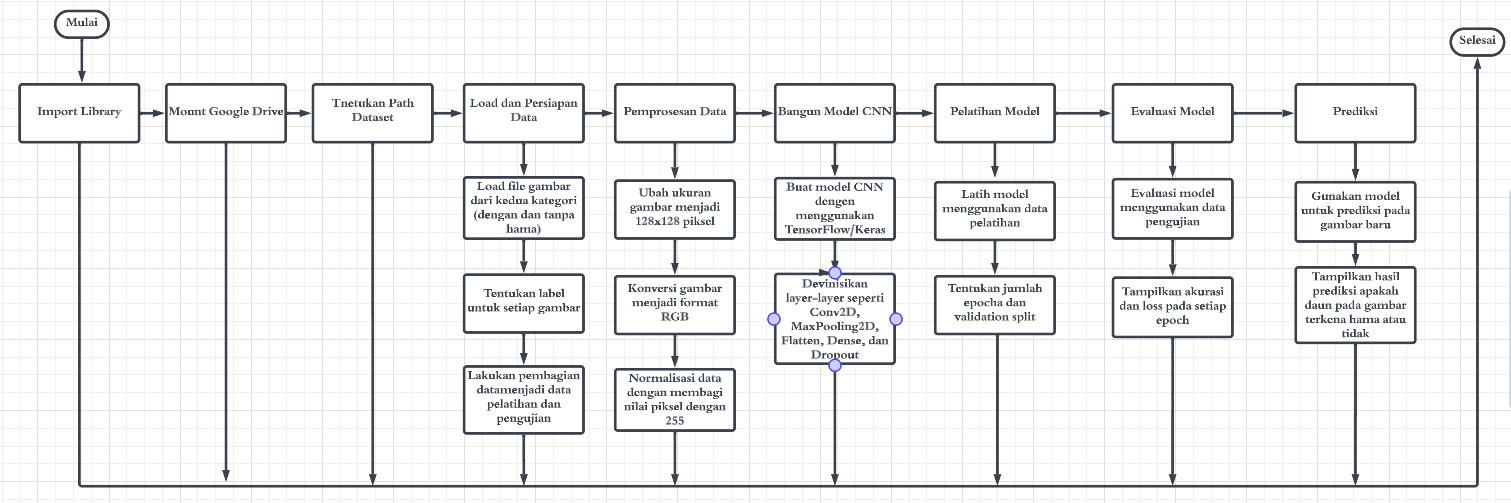